# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Setting Random seed to get consistent results
np.random.seed(444)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


In [3]:
weather_api_key = "3e403d23949e2aeed6ae69a09034d505"

In [25]:
import json
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="
city_url = f"{url}{cities[1]}"
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent = 4, sort_keys = True))


{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": 59.1167,
        "lon": 159.9667
    },
    "dt": 1675648912,
    "id": 2122262,
    "main": {
        "feels_like": -26.27,
        "grnd_level": 969,
        "humidity": 93,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": -19.27,
        "temp_max": -19.27,
        "temp_min": -19.27
    },
    "name": "Palana",
    "sys": {
        "country": "RU",
        "sunrise": 1675631994,
        "sunset": 1675662505
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 30,
        "gust": 5.51,
        "speed": 4
    }
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | palana
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | surt
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | kysyl-syr
Processing Record 12 of Set 1 | kenai
Processing Record 13 of Set 1 | kaeo
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | lubao
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | hovd
Processing Record 19 of Set 1 | bako
Processing Record 20 of Set 1 | nantucket
Processing Record 21 of Set 1 | lere
Processing Record 22 of Set 1 | ipu
Processing Recor

City not found. Skipping...
Processing Record 41 of Set 4 | llanes
Processing Record 42 of Set 4 | caiaponia
Processing Record 43 of Set 4 | gravelbourg
Processing Record 44 of Set 4 | talah
City not found. Skipping...
Processing Record 45 of Set 4 | richards bay
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | anito
Processing Record 48 of Set 4 | daru
Processing Record 49 of Set 4 | praya
Processing Record 50 of Set 4 | vila
Processing Record 1 of Set 5 | hobart
Processing Record 2 of Set 5 | qandala
Processing Record 3 of Set 5 | garchitorena
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | bhag
Processing Record 6 of Set 5 | castro
Processing Record 7 of Set 5 | khonuu
City not found. Skipping...
Processing Record 8 of Set 5 | puerto gaitan
Processing Record 9 of Set 5 | karasjok
Processing Record 10 of Set 5 | masindi
Processing Record 11 of Set 5 | ust-kulom
Processing Record 12 of Set 5 | maningrida
Processing Record 13 of Set 5 | mackenzi

Processing Record 29 of Set 8 | alice springs
Processing Record 30 of Set 8 | lucea
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | rylsk
Processing Record 33 of Set 8 | amapa
Processing Record 34 of Set 8 | kyren
Processing Record 35 of Set 8 | codrington
Processing Record 36 of Set 8 | hutchinson
Processing Record 37 of Set 8 | mitu
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | sweetwater
Processing Record 40 of Set 8 | asau
Processing Record 41 of Set 8 | marrakesh
Processing Record 42 of Set 8 | likasi
Processing Record 43 of Set 8 | saint-michel-des-saints
Processing Record 44 of Set 8 | mapastepec
Processing Record 45 of Set 8 | necochea
Processing Record 46 of Set 8 | ozinki
Processing Record 47 of Set 8 | puerto escondido
Processing Record 48 of Set 8 | santa cruz cabralia
Processing Record 49 of Set 8 | mount pleasant
Processing Record 50 of Set 8 | narsaq
Processing Record 1 of Set 9 | san juan del sur
Processing Record 2

Processing Record 16 of Set 12 | tidore
City not found. Skipping...
Processing Record 17 of Set 12 | tottori
Processing Record 18 of Set 12 | bartica
Processing Record 19 of Set 12 | paita
Processing Record 20 of Set 12 | ambilobe
Processing Record 21 of Set 12 | bam
Processing Record 22 of Set 12 | dauphin
Processing Record 23 of Set 12 | khandbari
Processing Record 24 of Set 12 | wahiawa
Processing Record 25 of Set 12 | kudahuvadhoo
Processing Record 26 of Set 12 | tiarei
Processing Record 27 of Set 12 | sorvag
City not found. Skipping...
Processing Record 28 of Set 12 | quincy
Processing Record 29 of Set 12 | temaraia
City not found. Skipping...
Processing Record 30 of Set 12 | ola
Processing Record 31 of Set 12 | udala
Processing Record 32 of Set 12 | taoudenni
Processing Record 33 of Set 12 | grand-lahou
Processing Record 34 of Set 12 | alofi
Processing Record 35 of Set 12 | aanekoski
Processing Record 36 of Set 12 | dombarovskiy
Processing Record 37 of Set 12 | ferkessedougou
Pro

In [44]:
print(city_data)

[]


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palana,59.1167,159.9667,-19.93,93,68,3.45,RU,1675646295
1,butaritari,3.0707,172.7902,26.91,83,100,7.60,KI,1675646195
2,surt,31.2089,16.5887,13.59,54,90,8.04,LY,1675646301
3,albany,42.6001,-73.9662,4.94,58,100,2.11,US,1675645949
4,ushuaia,-54.8000,-68.3000,2.49,90,72,0.92,AR,1675646150


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palana,59.1167,159.9667,-19.93,93,68,3.45,RU,1675646295
1,butaritari,3.0707,172.7902,26.91,83,100,7.60,KI,1675646195
2,surt,31.2089,16.5887,13.59,54,90,8.04,LY,1675646301
3,albany,42.6001,-73.9662,4.94,58,100,2.11,US,1675645949
4,ushuaia,-54.8000,-68.3000,2.49,90,72,0.92,AR,1675646150


In [19]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

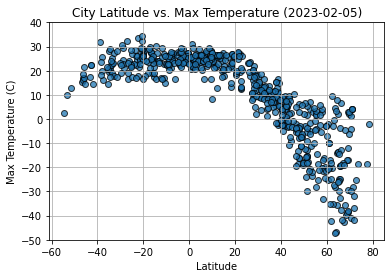

In [44]:
# Build scatter plot for latitude vs. temperature
Fig1 = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 0.75, edgecolors = 'black')

# Incorporate the other graph properties
plt.xlim(-61,85)
plt.ylim(-50,40)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-02-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

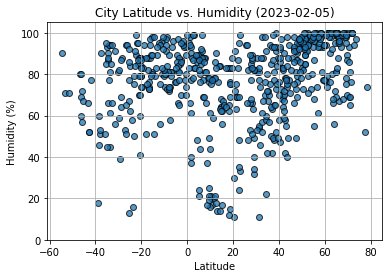

In [46]:
# Build the scatter plots for latitude vs. humidity
Fig2 = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 0.75, edgecolors = 'black')

# Incorporate the other graph properties
plt.xlim(-61,85)
plt.ylim(0,105)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

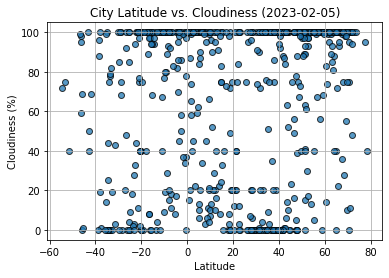

In [49]:
# Build the scatter plots for latitude vs. cloudiness
Fig3 = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha = 0.75, edgecolors = 'black')

# Incorporate the other graph properties
plt.xlim(-61,85)
plt.ylim(-5,105)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

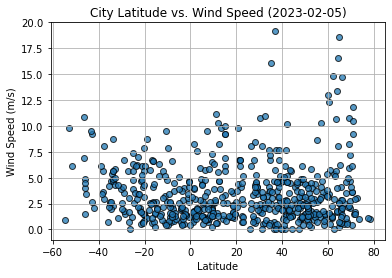

In [56]:
# Build the scatter plots for latitude vs. wind speed
Fig4 = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 0.75, edgecolors = 'black')

# Incorporate the other graph properties
plt.xlim(-61,85)
plt.ylim(-1,20)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots
def plotmaker(x, y, ylabel):
    # Creating Linear Regression Values
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    reg_values = slope * x + intercept
    line_eq = f"y = {round(slope,2)} * x + {round(intercept,2)}"
    
    # Printing r-value
    print(f"The r-value is: {rvalue}")
    
    # Creating the plot
    plt.scatter(x, y)
    plt.plot(x, reg_values, 'r-')
    plt.annotate(line_eq, (x.min()+5,y.min()+5), fontsize = 10, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.xlim(x.min() - 5, x.max() + 5)
    plt.ylim(y.min() - 5, y.max() + 5)


In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palana,59.1167,159.9667,-19.93,93,68,3.45,RU,1675646295
1,butaritari,3.0707,172.7902,26.91,83,100,7.60,KI,1675646195
2,surt,31.2089,16.5887,13.59,54,90,8.04,LY,1675646301
3,albany,42.6001,-73.9662,4.94,58,100,2.11,US,1675645949
9,kysyl-syr,63.8986,122.7617,-46.66,100,88,1.65,RU,1675646308


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ushuaia,-54.8000,-68.3000,2.49,90,72,0.92,AR,1675646150
5,rikitea,-23.1203,-134.9692,26.19,75,3,6.27,PF,1675646199
6,lebu,-37.6167,-73.6500,16.11,90,1,8.10,CL,1675646022
7,new norfolk,-42.7826,147.0587,22.18,52,50,2.68,AU,1675646191
8,punta arenas,-53.1500,-70.9167,10.06,71,75,9.77,CL,1675646199


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8580131968233441


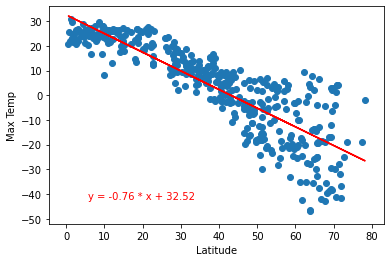

In [99]:
# Linear regression on Northern Hemisphere
plotmaker(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp")

The r-value is: 0.4192415295942212


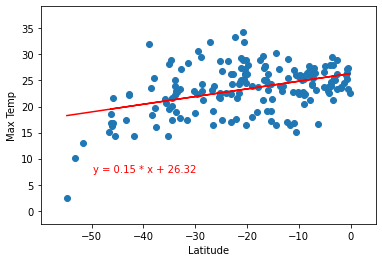

In [100]:
# Linear regression on Southern Hemisphere
plotmaker(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp")

**Discussion about the linear relationship:** In the Northern Hemisphere, we see a negative relationship between latitude and max temperature, but in the Southern Hemispher, we see a positive relationship between the two. This could be explained by the fact that places near the equator (latitude = 0) experience higher temperatures overall. With the Northern Hemisphere graph going away from the equator, we see a negative relationship, and with the Southern Hemisphere graph going towards the equator, we see a positive relationship 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4180934371391076


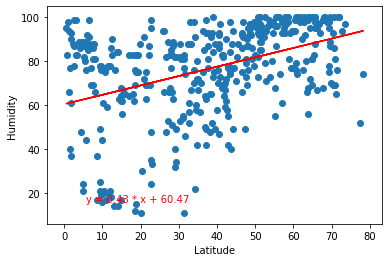

In [101]:
# Northern Hemisphere
plotmaker(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity")

The r-value is: 0.3349570514432313


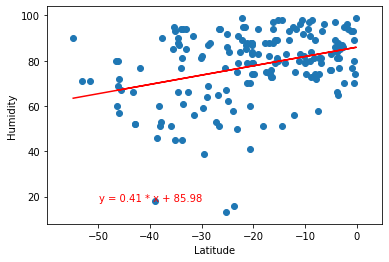

In [102]:
# Southern Hemisphere
plotmaker(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity")

**Discussion about the linear relationship:** We see positive relationships in both hemispheres, but looking at each r-squared values (Nothern: 0.418, Southern: 0.335), we see that latitude explains a low percentage of humidity's variance. So we cannot say if the relationship is strong between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2141980236437468


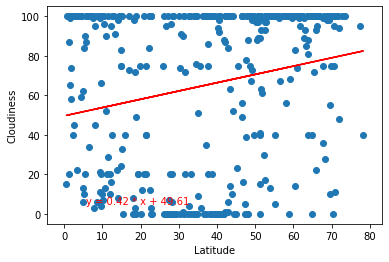

In [103]:
# Northern Hemisphere
plotmaker(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness")

The r-value is: 0.22504293948299847


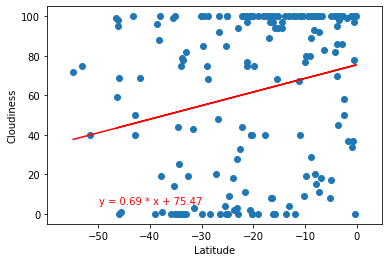

In [104]:
# Southern Hemisphere
plotmaker(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness")

**Discussion about the linear relationship:** In both hemispheres, we see that there is no relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05164537167435908


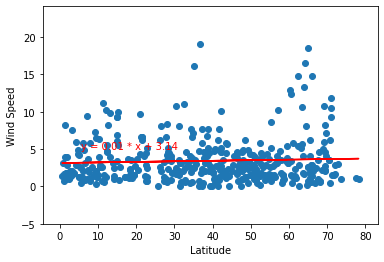

In [105]:
# Northern Hemisphere
plotmaker(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed")

The r-value is: -0.3611787227164014


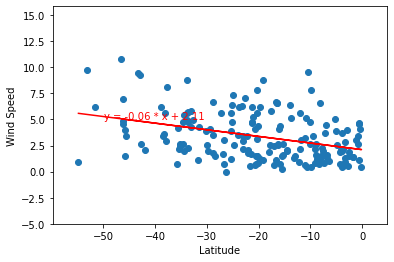

In [106]:
# Southern Hemisphere
plotmaker(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed")

**Discussion about the linear relationship:** In both hemispheres, we see that there is no relationship between latitude and wind speed. 